In [1]:
import obspy
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=os.path.join(os.getcwd()+"/data")
seq_3=os.path.join(data+'/*1003.npy')
print(seq_3)
#print(glob.glob(seq_3+"/*.jp2")[0:100])
files=glob.glob(seq_3+"/*.npy")[500:501]
files

/mnt/batch/tasks/shared/LS_root/mounts/clusters/sn-lab-d13/code/users/supanaesw/Seismic_noise_segmentation/data/*1003.npy


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/sn-lab-d13/code/users/supanaesw/Seismic_noise_segmentation/data/STP10-D1774P1003.npy/00001022.10.npy']

In [3]:
tr=np.load(files[0],allow_pickle=True)

In [203]:
tr.shape

(5601, 648)

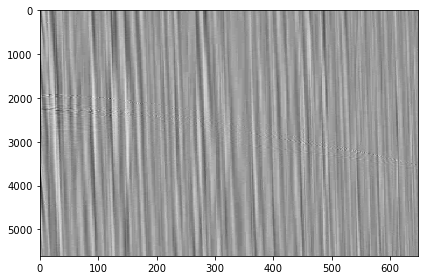

In [204]:
plt.imshow(tr,cmap="Greys",aspect="auto")
plt.tight_layout()
plt.show()

In [205]:
#https://docs.obspy.org/packages/autogen/obspy.core.trace.Stats.html#obspy.core.trace.Stats
stats=obspy.core.trace.Stats()
stats.delta=0.002

In [206]:
#https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.html#obspy.core.trace.Trace

stream=obspy.core.Stream()
for wv in range(tr.shape[1]):
    stream.append(obspy.core.trace.Trace(data=tr[:,wv],header=stats))    
#t=obspy.core.trace.Trace(data=tr)

print(type(stream.traces))
print(type(stream.traces[0]))
print(type(stream.traces[0].data))

#t=obspy.core.trace.Trace(data=tr[:,0],header=stats)
#t.stats

stream.filter("highpass",freq=1.0,corners=4,zerophase=True)

traces=stream.traces

#type(traces[0].data)

filtered_traces=np.array(traces)

filtered_traces.shape

vmin_tr=np.min(tr)
vmax_tr=np.max(tr)
#vmin_tr,vmax_tr

vmin_f=np.min(filtered_traces)
vmax_f=np.max(filtered_traces)

<class 'list'>
<class 'obspy.core.trace.Trace'>
<class 'numpy.ndarray'>


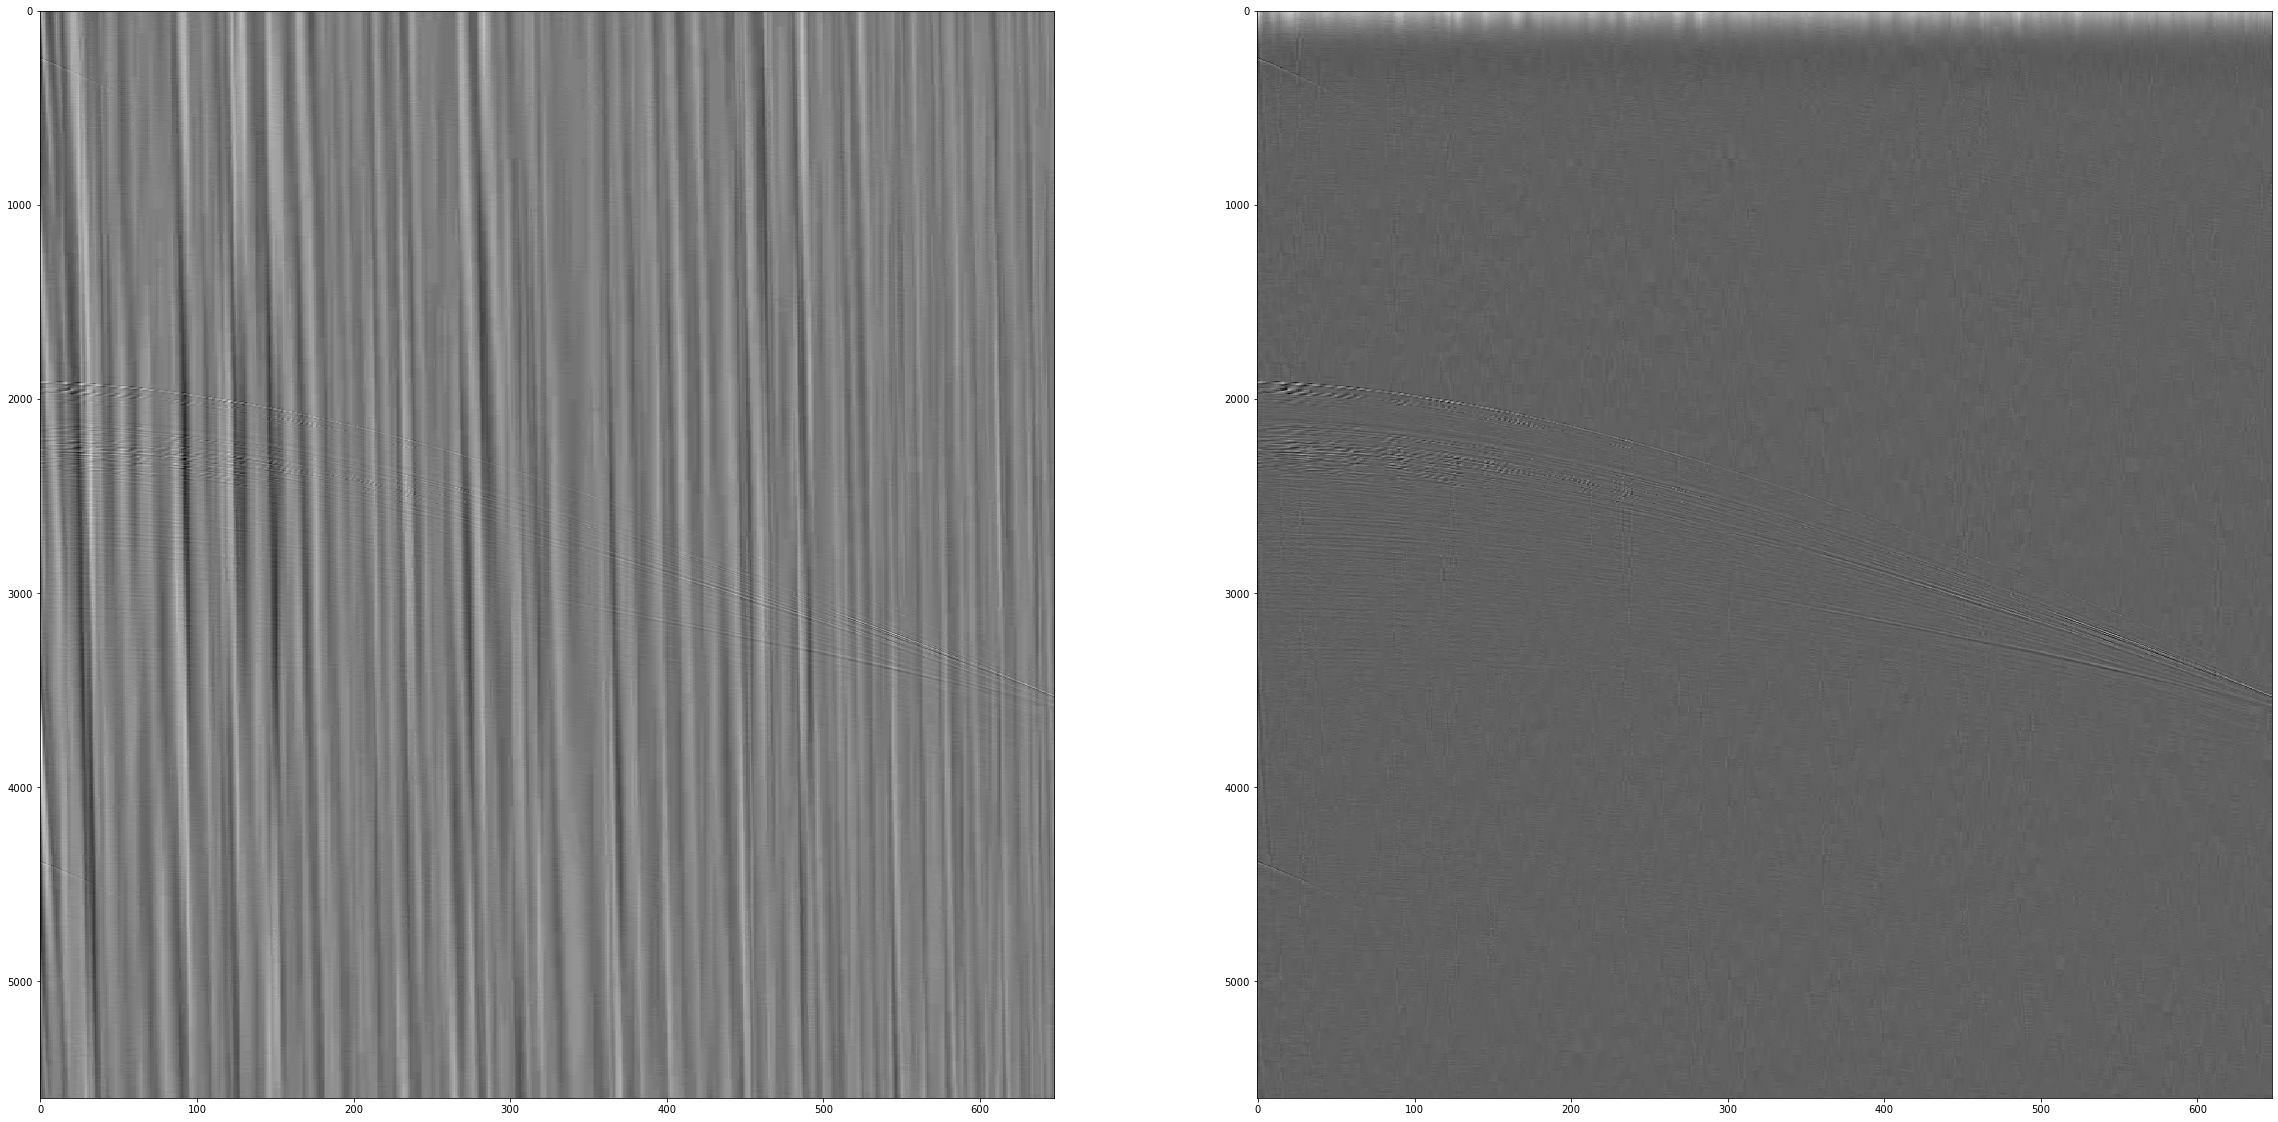

In [207]:
fig,axs = plt.subplots(1,2,figsize=(40,20))
axs[0].imshow(tr,cmap="gray",aspect="auto",vmin=vmin_tr,vmax=vmax_tr)
axs[1].imshow(filtered_traces.T,cmap="gray",aspect="auto",vmin=vmin_f,vmax=vmax_f)
plt.show()

In [302]:
data=filtered_traces.T
no_of_samples=data.shape[0] 
#t_values=np.linspace(0,(no_of_samples-1)*0.002,num=(no_of_samples),endpoint=True)
t_values=np.linspace(0,(no_of_samples-1)*0.002,num=(no_of_samples),endpoint=True)


In [303]:
t_values

array([  0.00000000e+00,   2.00000000e-03,   4.00000000e-03, ...,
         1.11960000e+01,   1.11980000e+01,   1.12000000e+01])

In [304]:
t_values.shape

(5601,)

In [305]:
alpha=2
#tgain=[0]
tgain=[pow(t,alpha) for t in t_values]
# for t_ in tt:
#     tgain.append(t_)

In [306]:
tgain=np.array(tgain)
tgain.shape=(5601,1)
tgain
             

array([[  0.00000000e+00],
       [  4.00000000e-06],
       [  1.60000000e-05],
       ..., 
       [  1.25350416e+02],
       [  1.25395204e+02],
       [  1.25440000e+02]])

In [307]:
np.tile(tgain,2)

array([[  0.00000000e+00,   0.00000000e+00],
       [  4.00000000e-06,   4.00000000e-06],
       [  1.60000000e-05,   1.60000000e-05],
       ..., 
       [  1.25350416e+02,   1.25350416e+02],
       [  1.25395204e+02,   1.25395204e+02],
       [  1.25440000e+02,   1.25440000e+02]])

In [289]:
(t_values*t_values)

tgain.shape

epsilon=0.00000001
x=np.array(tgain-((t_values*t_values)))
y=np.zeros(shape=(t_values.shape),dtype=float)
y.fill(epsilon)
x<y

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]], dtype=bool)

In [308]:
data.shape

(5601, 648)

In [309]:
np.tile(np.array([1,2,3]),3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [310]:
#Hadamard Product
gain_mat=np.tile(tgain,data.shape[1])

In [311]:
print(gain_mat.shape)
print(gain_mat[:,:2])

(5601, 648)
[[  0.00000000e+00   0.00000000e+00]
 [  4.00000000e-06   4.00000000e-06]
 [  1.60000000e-05   1.60000000e-05]
 ..., 
 [  1.25350416e+02   1.25350416e+02]
 [  1.25395204e+02   1.25395204e+02]
 [  1.25440000e+02   1.25440000e+02]]


In [312]:
gain_data=gain_mat*data
gain_data.shape

vmin_g,vmax_g=np.min(gain_data),np.max(gain_data)
vm_g=np.percentile(gain_data,99)
vm_f=np.percentile(filtered_traces,99)

In [313]:
type(tgain)
print(tgain.shape)

(5601, 1)


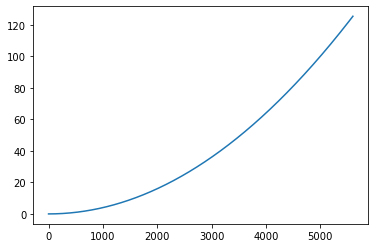

In [314]:

plt.plot(tgain)

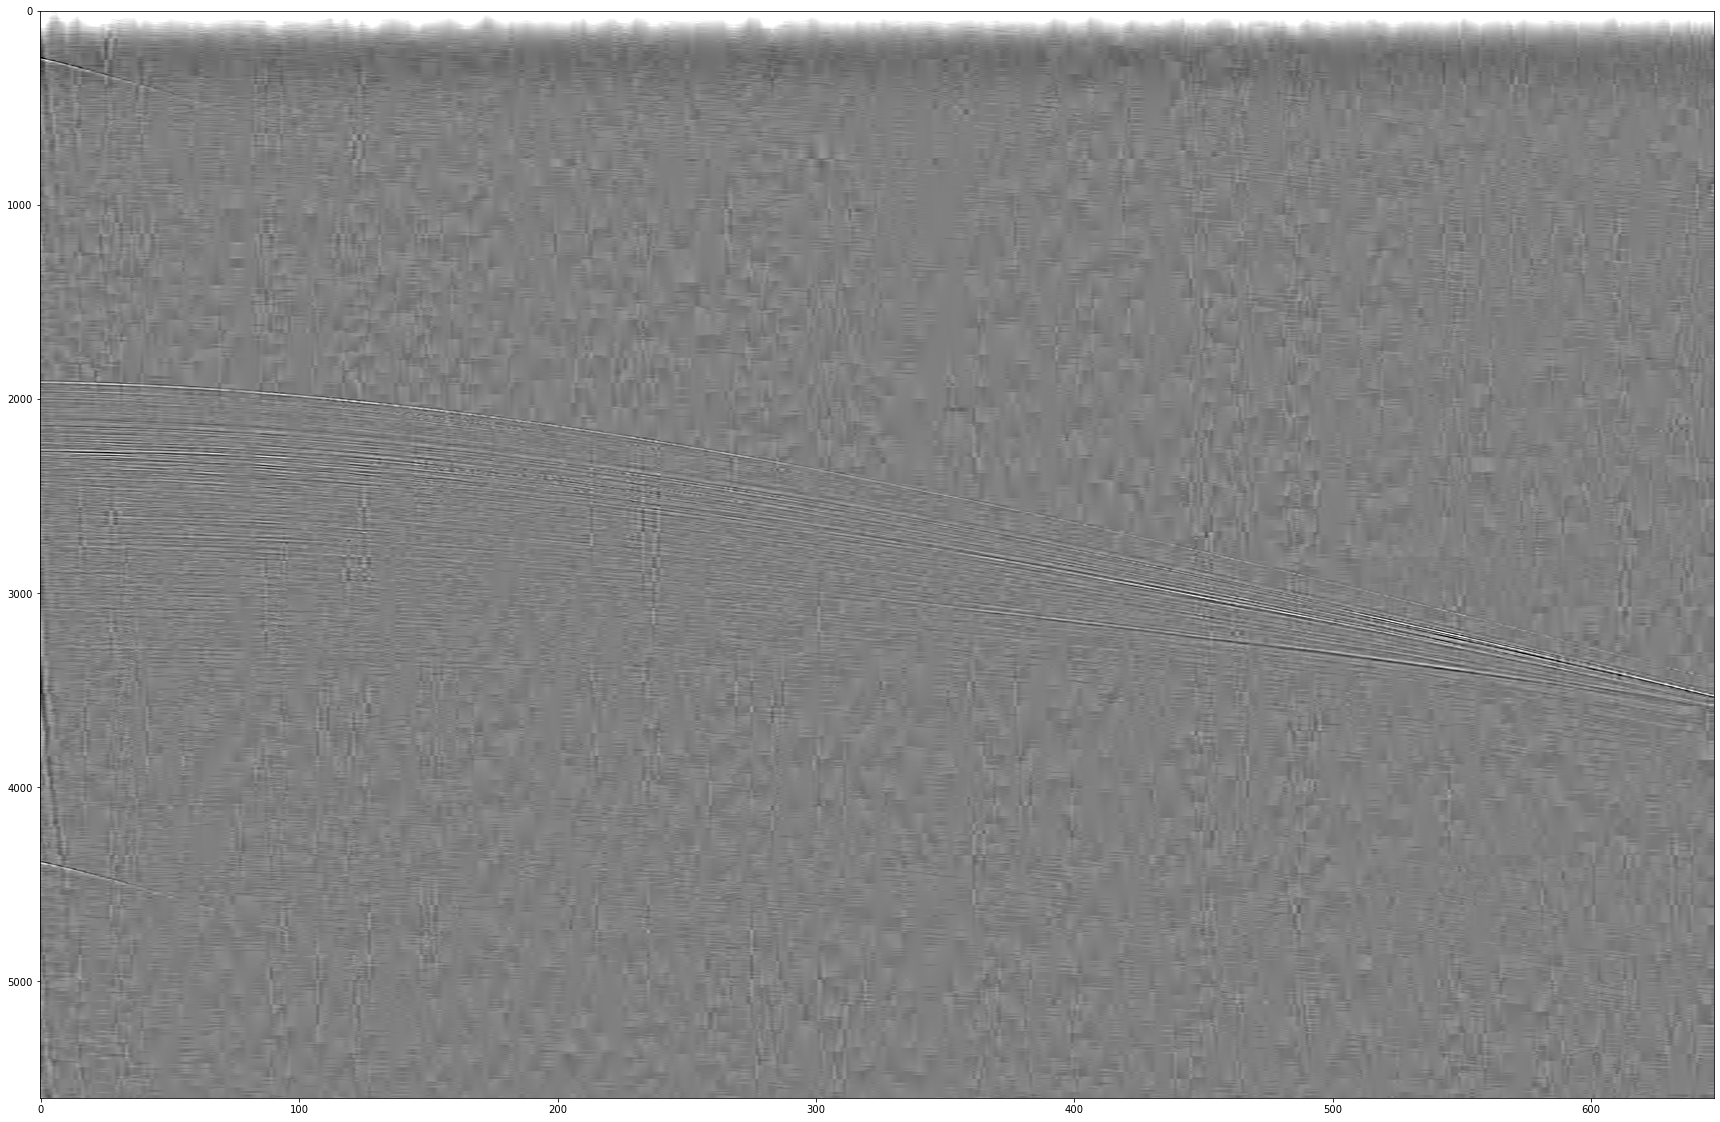

In [298]:
fig,axs = plt.subplots(figsize=(30,20))

vmin,vmax=vmin_f,vmax_f

#axs[0].imshow(tr,cmap="gray",aspect="auto",vmin=vmin_tr,vmax=vmax_tr)
#axs[1].imshow(filtered_traces.T,cmap="gray",aspect="auto",vmin=-vm_f,vmax=vm_f)
axs.imshow(filtered_traces.T,cmap="gray",aspect="auto",vmin=-vm_f,vmax=vm_f,interpolation="spline16")

# def onpress(event):
#     if event.button != 1:
#         return
#     x, y = event.xdata, event.ydata
#     axzoom.set_xlim(x - 0.1, x + 0.1)
#     axzoom.set_ylim(y - 0.1, y + 0.1)
#     figzoom.canvas.draw()

# fig.canvas.mpl_connect('button_press_event', onpress)

plt.show()


In [316]:
vmin_g,vmax_g=np.min(gain_data),np.max(gain_data)

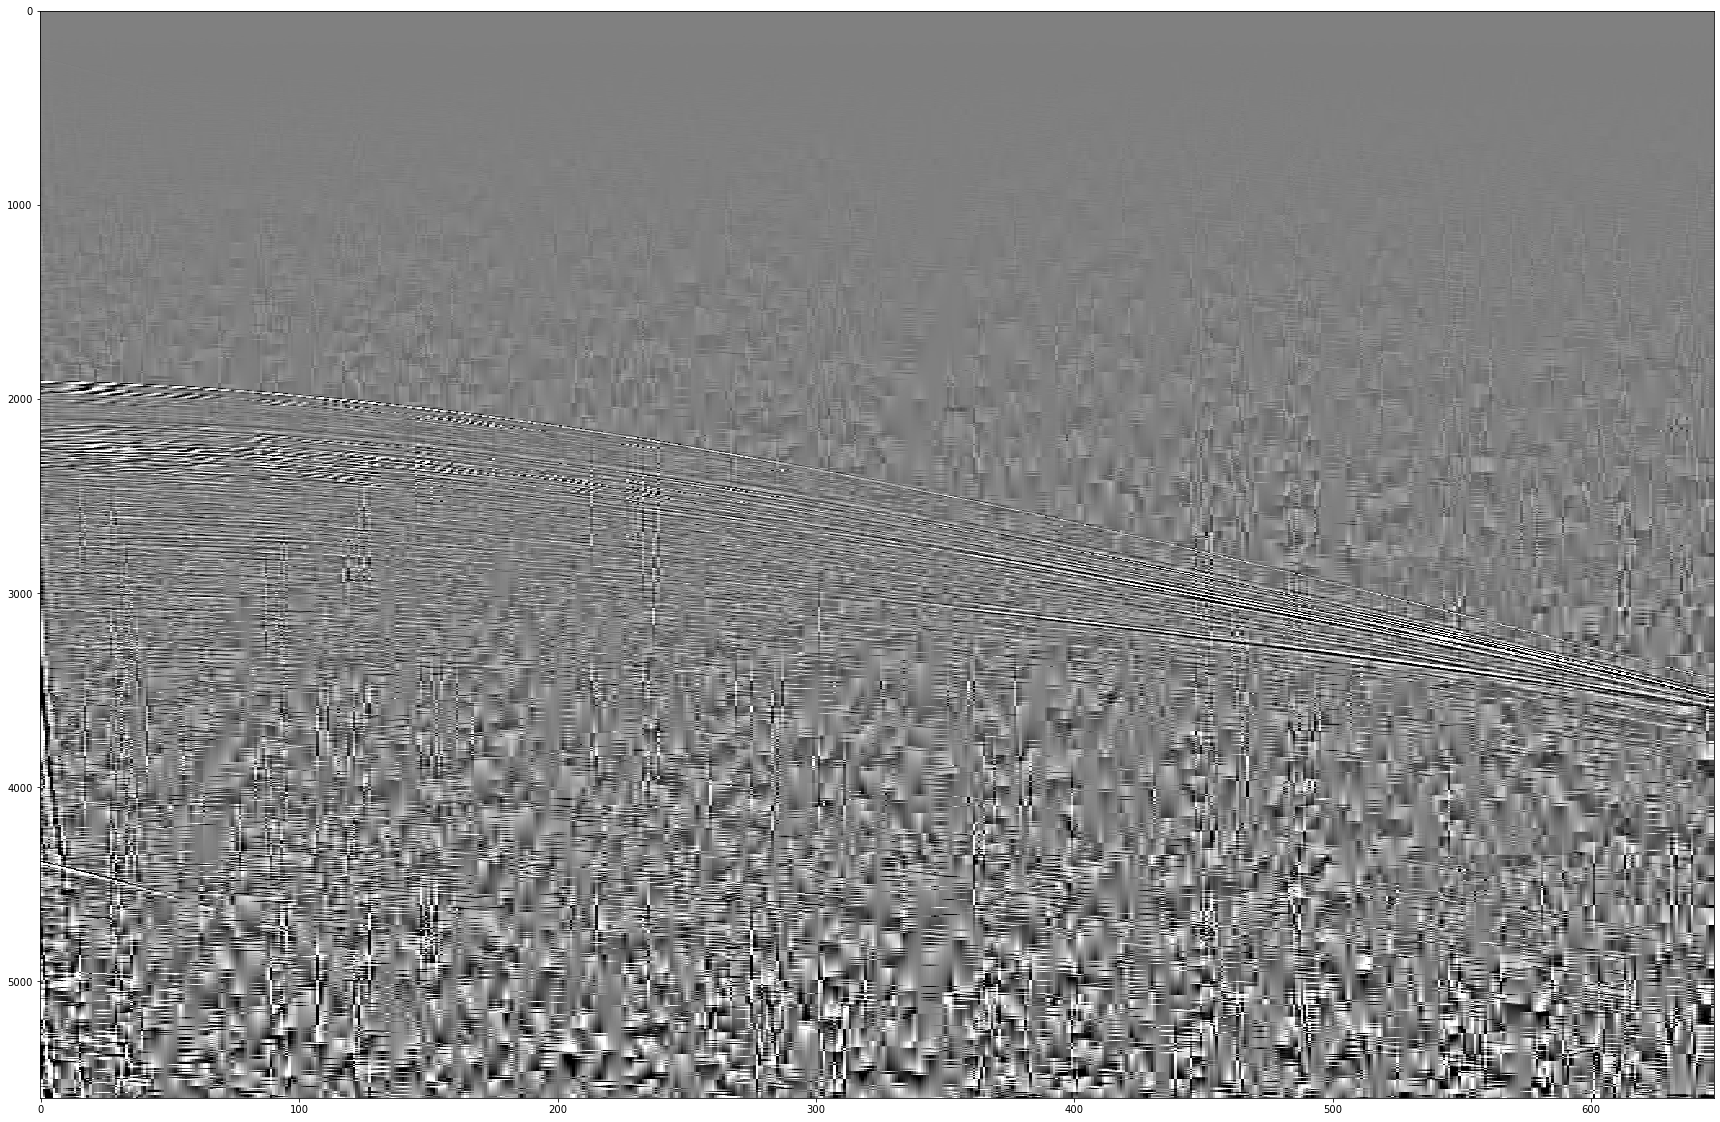

In [315]:
fig,axs = plt.subplots(figsize=(30,20))

vmin,vmax=vmin_f,vmax_f

#axs[0].imshow(tr,cmap="gray",aspect="auto",vmin=vmin_tr,vmax=vmax_tr)
#axs[1].imshow(filtered_traces.T,cmap="gray",aspect="auto",vmin=-vm_f,vmax=vm_f)
axs.imshow(gain_data,cmap="gray",aspect="auto",vmin=-vmin_g,vmax=vmax_g)

# def onpress(event):
#     if event.button != 1:
#         return
#     x, y = event.xdata, event.ydata
#     axzoom.set_xlim(x - 0.1, x + 0.1)
#     axzoom.set_ylim(y - 0.1, y + 0.1)
#     figzoom.canvas.draw()

# fig.canvas.mpl_connect('button_press_event', onpress)

plt.show()
plt.imsave("gain_data.png",gain_data,cmap="gray")

In [322]:
gain_data.dtype

dtype('float64')

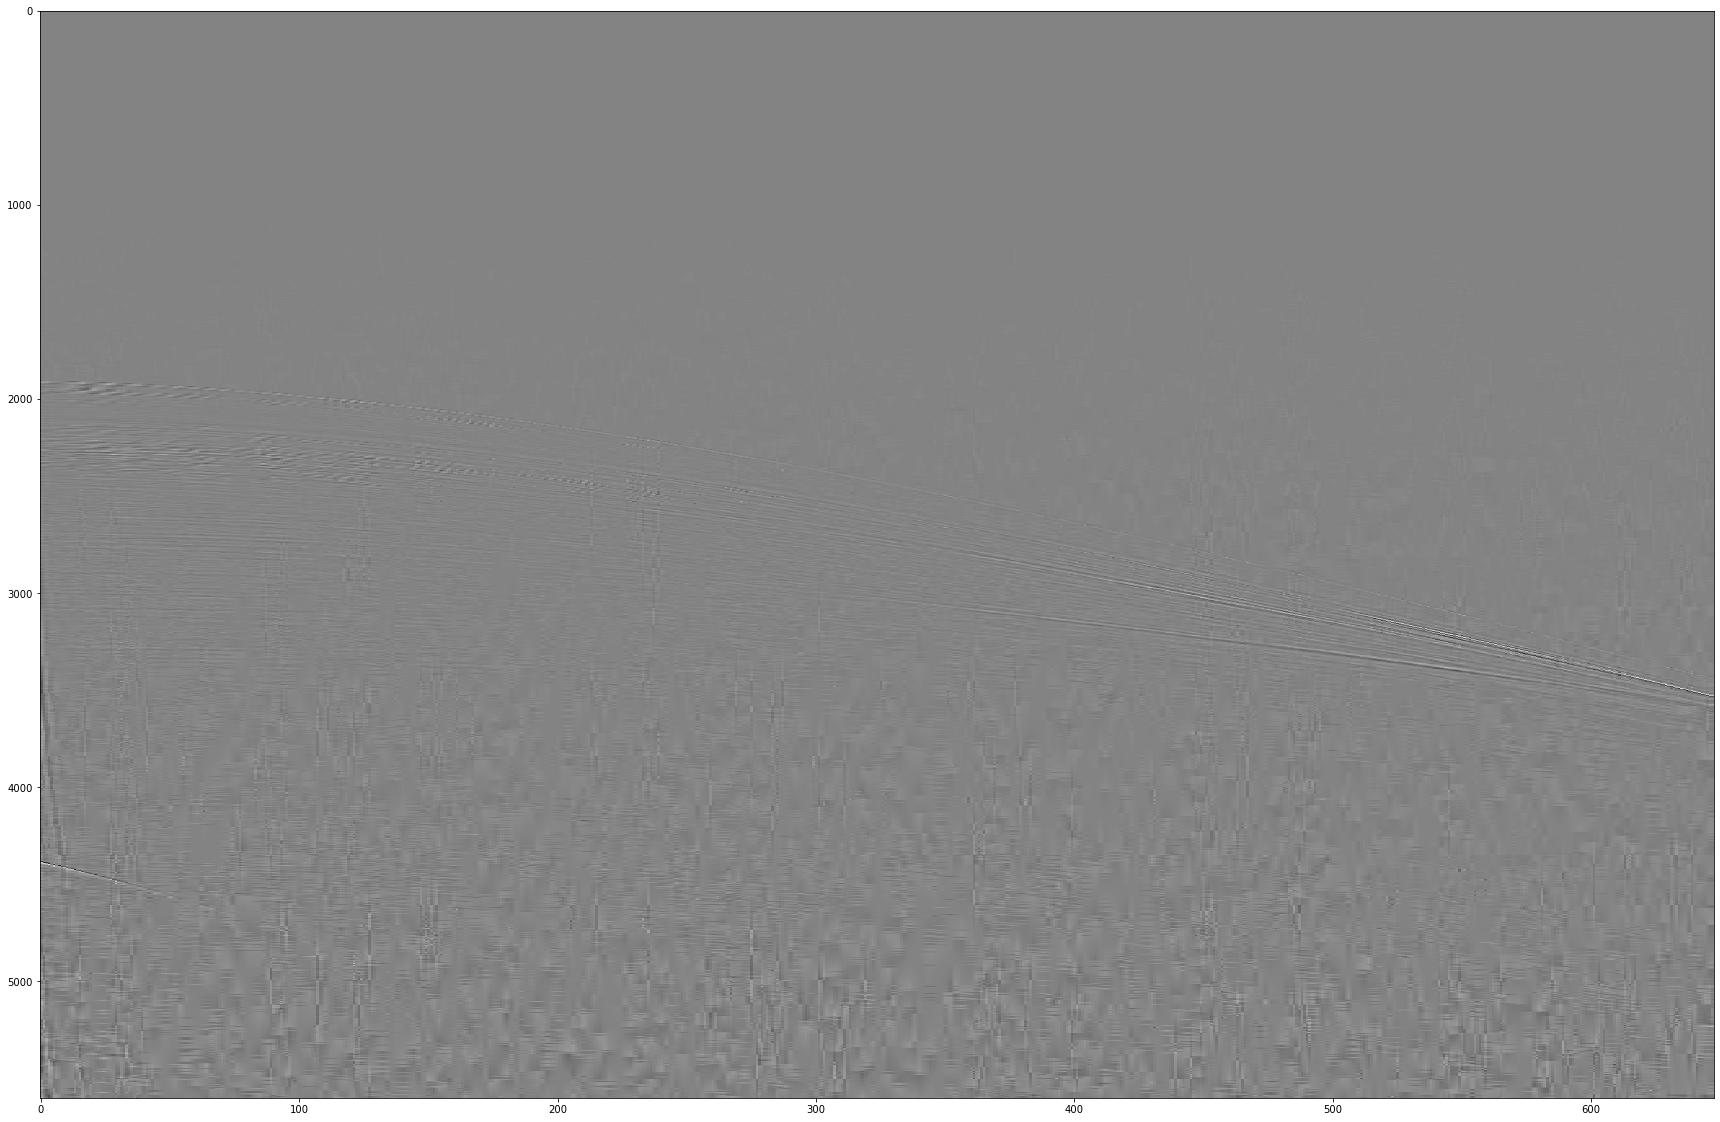

In [320]:
fig,axs = plt.subplots(figsize=(30,20))

vmin,vmax=vmin_f,vmax_f

#axs[0].imshow(tr,cmap="gray",aspect="auto",vmin=vmin_tr,vmax=vmax_tr)
#axs[1].imshow(filtered_traces.T,cmap="gray",aspect="auto",vmin=-vm_f,vmax=vm_f)
axs.imshow(gain_data,cmap="gray",aspect="auto",vmin=vmin_g,vmax=vmax_g)

# def onpress(event):
#     if event.button != 1:
#         return
#     x, y = event.xdata, event.ydata
#     axzoom.set_xlim(x - 0.1, x + 0.1)
#     axzoom.set_ylim(y - 0.1, y + 0.1)
#     figzoom.canvas.draw()

# fig.canvas.mpl_connect('button_press_event', onpress)

plt.show()
plt.imsave("gain_data.png",gain_data,cmap="gray")

In [319]:
vmin_g,vmax_g

(-900527.82200823317, 845026.18756580458)

([array([  0.00000000e+00,   0.00000000e+00,   5.57670500e-09,
           3.91112911e-07,   1.66260165e-06,   1.33840920e-08,
           4.08958367e-09,   2.97424267e-09,   1.85890167e-09,
           7.43560667e-10]),
  array([  0.00000000e+00,   7.43560667e-10,   1.11534100e-09,
           2.63592256e-07,   1.79458367e-06,   1.26405313e-08,
           4.83314433e-09,   3.71780333e-09,   1.11534100e-09,
           0.00000000e+00]),
  array([  0.00000000e+00,   0.00000000e+00,   1.85890167e-09,
           2.83668394e-07,   1.77822533e-06,   1.30123117e-08,
           4.83314433e-09,   7.43560667e-10,   0.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   0.00000000e+00,   7.43560667e-10,
           2.30875587e-07,   1.83622307e-06,   1.15251903e-08,
           2.97424267e-09,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   0.00000000e+00,   1.85890167e-09,
           2.37939413e-07,   1.83213348e-06,   9.29450834e-09,
  

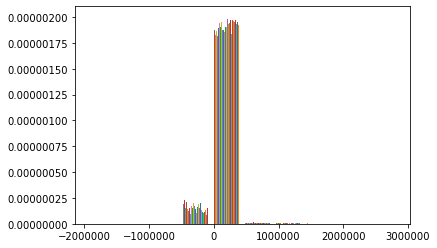

In [213]:
plt.hist(gain_data,bins=10,density=True)

([array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.53976038e-06,
           9.48492392e-05,   9.57730955e-05,   7.08289774e-06,
           3.07952075e-07]),
  array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.53976038e-06,
           1.01932137e-04,   8.93061019e-05,   6.46699358e-06,
           3.07952075e-07]),
  array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   2.15566453e-06,
           1.08399131e-04,   8.25311562e-05,   6.15904151e-06,
           3.07952075e-07]),
  array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.84771245e-06,
           1.15482028e-04,   7.63721147e-05,   5.54313736e-06,
           3.07952075e-07]),
  array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   2.15566453e-06,
  

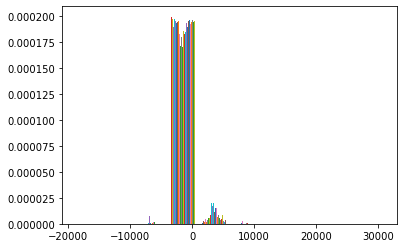

In [214]:
plt.hist(filtered_traces,bins=10,density=True)

In [324]:
gain_data.dump(os.getcwd()+"/gain_data_f64.npy")

In [326]:
from plotly.offline import init_notebook_mode,iplot
from plotly.graph_objs import *

In [327]:
init_notebook_mode(connected=True)

In [329]:

trace0 = Scatter(
  x=[1, 2, 3, 4],
  y=[10, 15, 13, 17]
)
trace1 = Scatter(
  x=[1, 2, 3, 4],
  y=[16, 5, 11, 9]
)
data = Data([trace0, trace1])

(data)  

NameError: name 'plot' is not defined